/tmp/ipykernel_4023814/1723773166.py:101: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


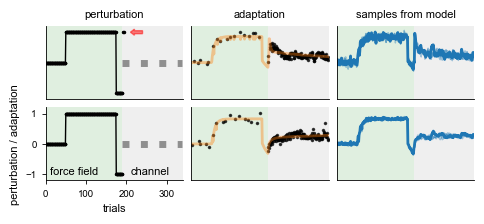

('noiseFitPlot.pdf', 'noiseFitPlot.svg')

In [31]:
# Retry with corrected parsing of family/suffix from keys (handles 'dual_rate_*').

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Circle, FancyArrow

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable

def build_piecewise_ys(paradigm = 'er'):
    t = 340
    ys = []
    if paradigm == 'er':
        for i in range(t):
            if i < 50:
                z = 0.0
            elif i < 175:
                z = 1.0
            elif i < 190:
                z = -1.0
            elif i < 192:
                ys.append(np.nan)
                continue
            elif i < 194:
                z = 1.0
            else:
                ys.append(np.nan)
                continue
            ys.append(z)
    elif paradigm == 'sr':
        for i in range(t):
            if i < 50:
                z = 0.0
            elif i < 175:
                z = 1.0
            elif i < 190:
                z = -1.0
            else:
                ys.append(np.nan)
                continue
            ys.append(z)
    return np.array(ys)


rng = np.random.default_rng(7)

def load_or_mock(path):
    if os.path.exists(path):
        try:
            arr = np.loadtxt(path, dtype=float)
            return np.array(arr).reshape(-1)
        except Exception:
            pass
    return np.clip(rng.normal(0.65, 0.12, size=16), 0, 1)

# base_dir = "/mnt/data"
base_dir=''
filenames = {
    "coin_a":      os.path.join(base_dir, "/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/coin_bicsOct16.txt"),
    "dual_rate_a": os.path.join(base_dir, "dual_rate_a.txt"),
    "dual_rate_x": os.path.join(base_dir, "dual_rate_x.txt"),
    "clnn_a":      os.path.join(base_dir, "clnn_a.txt"),
    "clnn_x":      os.path.join(base_dir, "clnn_x.txt"),
    "clnn_u":      os.path.join(base_dir, "clnn_u.txt"),
}
data = {k: load_or_mock(p) for k,p in filenames.items()}
for k,p in filenames.items():
    if not os.path.exists(p):
        np.savetxt(p, data[k], fmt="%.6f")

mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "lines.linewidth": 1.0,
    "axes.linewidth": 0.6,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
    "legend.frameon": False,
    "pdf.fonttype": 42, "ps.fonttype": 42, "svg.fonttype": "none",
})

def mm_to_in(mm): return mm/25.4
# W = mm_to_in(183)
W = mm_to_in(120)
H = W * 0.45 #0.9
fig, axes = plt.subplots(2, 3, figsize=(W, H), constrained_layout=True,)
# fig, axes = plt.subplots(4, 4, figsize=(W, H), constrained_layout=True)
# plt.subplots_adjust(wspace=0.02, hspace=0.02, left=1)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
order = ["coin_a", "dual_rate_a", "dual_rate_x", "clnn_a", "clnn_x", "clnn_u"]
# families = {"coin": "///", "dual_rate": "xx", "clnn": "++"}
# families = {"coin": "", "dual_rate": "xx", "clnn": "++"}
# suffix_colors = {"a": "#254EDB", "x": "#E59F00", "u": "#F6C453"}
# families = {"coin": "#254EDB", "dual_rate": "#9B28AA", "clnn": "#F58529"}
# suffixes = {"a": "", "x": "//", "u": "xx"}
# sfx_for_legend = {"a": "output\n or input", "x": "internal\n node", "u": "efference\n copy"}
# fam_for_legend = {"coin": "COIN", "dual_rate": "dual-rate", "clnn": "CLNN"}
def subgroup(idx):
    return "SR" if idx < 8 else "ER"
bg_color = {"SR": "#F7FBFF", "ER": "#FFF8F0"}

xpos = np.arange(len(order))
bar_width = 0.9
edge_width = 0.6
highlight_width = 2.4

YRANGE = 300          # ← the common height you want
means = [np.mean([data[k][s] for k in order]) for s in range(16)]

ids = [8,12]

for s in range(2):
    r, c = divmod(s, 2)


    i = ids[s]
    # np.savetxt(f'run{i}_prior.txt', np.mean(prior_a, axis=1))
    # np.savetxt(f'run{i}_posterior.txt', np.mean(posterior_a, axis=1))
    # np.savetxt(f'run{i}_exp.txt', exp_datasets[i-1])
    # np.savetxt(f'run{i}_prior0123.txt', prior_a[0:4])
    prior_a = np.loadtxt(f'run{i}_prior.txt')
    posterior_a = np.loadtxt(f'run{i}_posterior.txt')
    exp_data = np.loadtxt(f'run{i}_exp.txt')
    prior_a0123 = np.loadtxt(f'run{i}_prior0123.txt')

    ax = axes[s, 0]
    # ax.set_facecolor(bg_color[subgroup(s)])
    pert = build_piecewise_ys(paradigm='er' if s==0 else 'sr')
    x_pert = np.arange(len(pert))
    ax.plot(x_pert,pert, label='experiment', marker='o', color='black', alpha=1,  markersize=1.5,linewidth=1)
    ax.plot(x_pert[np.isnan(pert)],np.isnan(pert)[np.isnan(pert)]*0,':', label='experiment', marker=None, color='black', alpha=0.4,  markersize=1.5,linewidth=5.)
    ccc = FancyArrow(240,1, -30, -0, width=0.1, length_includes_head=True, head_width=0.2, head_length=10, color='red', alpha=0.5)
    if s==0:
        ax.add_patch(ccc)
    # ax.plot(-prior_a, label='prior', linestyle='-', color='tab:orange', alpha=0.4, linewidth=2)
    ax.set_ylim(-1.2, 1.2)
    if s==0:
        ax.set_yticks([])      # no ticks
        ax.set_xticks([])      # no ticks 
    else:
        ax.set_xlabel("trials")
        ax.set_ylabel("perturbation / adaptation")
        ax.text(10.05, -1.0, 'force field')
        ax.text(210, -1.0, 'channel')

    if s==0: ax.title.set_text('perturbation')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    def organize_bg(ax):
        ax.axvspan(0, 190, facecolor='green', alpha=0.12, zorder=0)
        ax.axvspan(190, 340, facecolor='gray',  alpha=0.12, zorder=0)
        ax.set_xlim(0,340)
    organize_bg(ax)
    ax = axes[s, 1]
    # ax.set_facecolor(bg_color[subgroup(s)])
    ax.plot(-exp_data, label='experiment', marker='o', color='black', alpha=0.7,  markersize=1.5,linewidth=0.001)
    ax.plot(-prior_a, label='model mean', linestyle='-', color='tab:orange', alpha=0.4, linewidth=2)
    # if s==1: ax.legend(loc='lower left', fontsize=7, framealpha=0.5)
    ax.set_ylim(-1.2, 1.2)
    if True:
        ax.set_yticks([])      # no ticks
        ax.set_xticks([])      # no ticks 
    else:
        ax.set_xlabel("trials")
        ax.set_ylabel("perturbation / adaptation")

    if s==0: ax.title.set_text('adaptation')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    organize_bg(ax)
    
    ax = axes[s, 2]
    ax.plot(-prior_a0123[:,0], label='prior', linestyle='-', color='tab:blue',linewidth=2)
    ax.plot(-prior_a0123[:,1:], label='prior', linestyle='-', color='tab:blue', alpha=0.4, linewidth=1)
    #remove all the axes decorations
    ax.set_yticks([])      # no ticks
    ax.set_xticks([])      # no ticks
    ax.set_ylim(-1.2, 1.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if s==0: ax.title.set_text('samples from model')
    organize_bg(ax)


    # ymin = min(values.min(), subject_mean) - 0.05 * max(1e-6, abs(values).max())
    # ymax = max(values.max(), subject_mean) + 0.08 * max(1e-6, abs(values).max())
    
    # best_val = values.min()
    # for i, key in enumerate(order):
    #     parts = key.split("_")
    #     fam = "_".join(parts[:-1])
    #     sfx = parts[-1]
        # color = suffix_colors[sfx]
        # hatch = families[fam]
        # color = families[fam]
        # hatch = suffixes[sfx]
        # lw = highlight_width if np.isclose(values[i], best_val) else edge_width
        # ax.bar(i, values[i], width=bar_width, color=color, edgecolor="black",
        #        linewidth=lw, hatch=hatch)
    
    # ax.axhline(subject_mean, ls="--", lw=0.8, color="0.4", dashes=(2,2), zorder=0)
    # subject_mean = means[s]
    # ax.set_ylim(subject_mean - YRANGE/2, subject_mean + YRANGE/2)
    # ax.text(0.3, 0.02, f"{subgroup(s)}{s%8+1}", ha="center", va="bottom", transform=ax.transAxes, fontsize=8)
    # ax.set_ylim(ymin, ymax)
    # ax.set_xticks(xpos)
    # if r==3 and c==0:
    #     ax.set_xticklabels(["COIN","dual-rate OL","dual-rate CL ($\eta_{x_s}$)","CLNN OL","CLNN CL ($\eta_x$)","CLNN CL ($\eta_u$)"], rotation=35, ha="right")
    # # if c == 0:
    #     ax.set_ylabel("                                        BIC [nats] (smaller = better)", labelpad=2)
    #     ax.set_yticklabels([])

    # else:
    #     ax.set_yticklabels([])
    #     ax.set_xticklabels([])
    # ax.set_title(f"S{s+1:02d} • {subgroup(s)}", pad=2)
    ax.set_xticks([]); 
    ax.set_yticklabels([])

    if not c==0:
        ax.set_yticks([])      # no ticks
    # for spine in ax.spines.values():           # no box around the axes
    #     spine.set_visible(False)
    # also remove per-axes titles/labels if you had any:
    # ax.set_xlabel(""); ax.set_ylabel(""); ax.set_title("")

# Legends
# color_handles = [Patch(facecolor=col, edgecolor="black", label=fam_for_legend[sfx]) for sfx, col in families.items()]
# hatch_handles = [Patch(facecolor="white", edgecolor="black", hatch=h, label=sfx_for_legend[fam]) for fam,h in suffixes.items()]
# fig.legend(handles=hatch_handles, ncol=len(hatch_handles), loc="lower left", bbox_to_anchor=(0.01, 1.04), frameon=False, title="noise injected to")
# fig.legend(handles=color_handles, ncol=len(color_handles), loc="lower right", bbox_to_anchor=(0.99, 1.04), frameon=False, title="model")
# fig.suptitle("Model Comparison", y=1.06, fontsize=9)



pdf_path = os.path.join(base_dir, "noiseFitPlot.pdf")
svg_path = os.path.join(base_dir, "noiseFitPlot.svg")
fig.savefig(pdf_path, format="pdf", bbox_inches="tight", transparent=True)
fig.savefig(svg_path, format="svg", bbox_inches="tight", transparent=True)
plt.show()

pdf_path, svg_path


In [32]:
os.path.join(base_dir, "subject_bar_grid.svg")

'subject_bar_grid.svg'

In [33]:
print( [k for k in ax.spines.keys()])

['left', 'right', 'bottom', 'top']


In [34]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [35]:
print( [k for k in ax.spines.keys()])

['left', 'right', 'bottom', 'top']
